In [1]:
import talib as ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stock_return_df=pd.read_csv("returns_20181228.csv")
stock_return_df.head()

,Date,stock_0,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,stock_7,stock_8,...,stock_1131,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140
0,1990-01-03,-0.561639,0.113423,-1.580584,-0.017527,1.055723,1.306785,-0.692687,1.303057,-0.243042,...,1.410213,-0.307705,0.829215,-0.505364,0.232976,-0.393465,-0.471561,-0.308961,-0.202832,-0.205398
1,1990-01-04,-1.841947,0.463435,-1.172764,0.513875,2.470817,0.463057,0.427191,-0.737959,1.455408,...,-0.656517,-1.327001,0.770307,0.485192,-0.199085,-0.590958,-0.513262,0.369685,-0.549467,0.279644
2,1990-01-05,-0.277859,0.216396,-0.429848,0.802112,2.686740,0.059472,-0.895917,-0.785620,0.022776,...,0.098997,0.197211,-2.003799,2.101860,0.442342,-0.677487,-0.955708,0.926602,-0.762952,2.046626
3,1990-01-08,-0.881483,1.867996,-1.659936,0.313561,0.868181,-1.923021,-1.788387,2.902709,0.600026,...,-0.366244,0.480905,-0.780784,-0.131875,-0.657870,-1.526045,-0.140225,1.410707,0.168989,0.787590
4,1990-01-09,-0.534578,0.413210,0.004407,1.223128,0.972728,1.420754,1.864039,1.564482,0.243046,...,1.469816,0.017081,-1.603788,-2.895389,0.540079,-1.126372,-1.737689,1.036790,1.243899,0.069950


In [3]:
valid_data_df=pd.DataFrame()
for column_name in stock_return_df.columns:
    if stock_return_df.iloc[-1][column_name]!=0:
        valid_data_df[column_name]=stock_return_df[column_name]
valid_data_df.head()

,Date,stock_0,stock_1,stock_2,stock_3,stock_4,stock_6,stock_7,stock_8,stock_9,...,stock_1131,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140
0,1990-01-03,-0.561639,0.113423,-1.580584,-0.017527,1.055723,-0.692687,1.303057,-0.243042,0.081520,...,1.410213,-0.307705,0.829215,-0.505364,0.232976,-0.393465,-0.471561,-0.308961,-0.202832,-0.205398
1,1990-01-04,-1.841947,0.463435,-1.172764,0.513875,2.470817,0.427191,-0.737959,1.455408,0.971196,...,-0.656517,-1.327001,0.770307,0.485192,-0.199085,-0.590958,-0.513262,0.369685,-0.549467,0.279644
2,1990-01-05,-0.277859,0.216396,-0.429848,0.802112,2.686740,-0.895917,-0.785620,0.022776,-1.336882,...,0.098997,0.197211,-2.003799,2.101860,0.442342,-0.677487,-0.955708,0.926602,-0.762952,2.046626
3,1990-01-08,-0.881483,1.867996,-1.659936,0.313561,0.868181,-1.788387,2.902709,0.600026,-0.943956,...,-0.366244,0.480905,-0.780784,-0.131875,-0.657870,-1.526045,-0.140225,1.410707,0.168989,0.787590
4,1990-01-09,-0.534578,0.413210,0.004407,1.223128,0.972728,1.864039,1.564482,0.243046,1.345295,...,1.469816,0.017081,-1.603788,-2.895389,0.540079,-1.126372,-1.737689,1.036790,1.243899,0.069950


In [4]:
valid_data_df.fillna(0)
valid_data_df.head()

,Date,stock_0,stock_1,stock_2,stock_3,stock_4,stock_6,stock_7,stock_8,stock_9,...,stock_1131,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140
0,1990-01-03,-0.561639,0.113423,-1.580584,-0.017527,1.055723,-0.692687,1.303057,-0.243042,0.081520,...,1.410213,-0.307705,0.829215,-0.505364,0.232976,-0.393465,-0.471561,-0.308961,-0.202832,-0.205398
1,1990-01-04,-1.841947,0.463435,-1.172764,0.513875,2.470817,0.427191,-0.737959,1.455408,0.971196,...,-0.656517,-1.327001,0.770307,0.485192,-0.199085,-0.590958,-0.513262,0.369685,-0.549467,0.279644
2,1990-01-05,-0.277859,0.216396,-0.429848,0.802112,2.686740,-0.895917,-0.785620,0.022776,-1.336882,...,0.098997,0.197211,-2.003799,2.101860,0.442342,-0.677487,-0.955708,0.926602,-0.762952,2.046626
3,1990-01-08,-0.881483,1.867996,-1.659936,0.313561,0.868181,-1.788387,2.902709,0.600026,-0.943956,...,-0.366244,0.480905,-0.780784,-0.131875,-0.657870,-1.526045,-0.140225,1.410707,0.168989,0.787590
4,1990-01-09,-0.534578,0.413210,0.004407,1.223128,0.972728,1.864039,1.564482,0.243046,1.345295,...,1.469816,0.017081,-1.603788,-2.895389,0.540079,-1.126372,-1.737689,1.036790,1.243899,0.069950


In [5]:
valid_data_df["index"]=valid_data_df.mean(axis=1)
valid_data_df.head()

,Date,stock_0,stock_1,stock_2,stock_3,stock_4,stock_6,stock_7,stock_8,stock_9,...,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140,index
0,1990-01-03,-0.561639,0.113423,-1.580584,-0.017527,1.055723,-0.692687,1.303057,-0.243042,0.081520,...,-0.307705,0.829215,-0.505364,0.232976,-0.393465,-0.471561,-0.308961,-0.202832,-0.205398,0.688891
1,1990-01-04,-1.841947,0.463435,-1.172764,0.513875,2.470817,0.427191,-0.737959,1.455408,0.971196,...,-1.327001,0.770307,0.485192,-0.199085,-0.590958,-0.513262,0.369685,-0.549467,0.279644,0.656702
2,1990-01-05,-0.277859,0.216396,-0.429848,0.802112,2.686740,-0.895917,-0.785620,0.022776,-1.336882,...,0.197211,-2.003799,2.101860,0.442342,-0.677487,-0.955708,0.926602,-0.762952,2.046626,0.710971
3,1990-01-08,-0.881483,1.867996,-1.659936,0.313561,0.868181,-1.788387,2.902709,0.600026,-0.943956,...,0.480905,-0.780784,-0.131875,-0.657870,-1.526045,-0.140225,1.410707,0.168989,0.787590,0.727716
4,1990-01-09,-0.534578,0.413210,0.004407,1.223128,0.972728,1.864039,1.564482,0.243046,1.345295,...,0.017081,-1.603788,-2.895389,0.540079,-1.126372,-1.737689,1.036790,1.243899,0.069950,0.755952


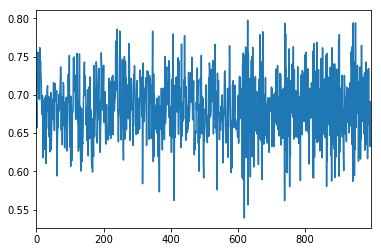

In [6]:
valid_data_df["index"].plot()

In [7]:
valid_data_df=valid_data_df.set_index("Date")
stock_equity_df=(valid_data_df/100+1).cumprod()
stock_equity_df.head()

,stock_0,stock_1,stock_2,stock_3,stock_4,stock_6,stock_7,stock_8,stock_9,stock_10,...,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140,index
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-03,0.994384,1.001134,0.984194,0.999825,1.010557,0.993073,1.013031,0.997570,1.000815,0.998202,...,0.996923,1.008292,0.994946,1.002330,0.996065,0.995284,0.996910,0.997972,0.997946,1.006889
1990-01-04,0.976068,1.005774,0.972652,1.004963,1.035526,0.997315,1.005555,1.012088,1.010535,1.017271,...,0.983694,1.016059,0.999774,1.000334,0.990179,0.990176,1.000596,0.992488,1.000737,1.013501
1990-01-05,0.973355,1.007950,0.968471,1.013024,1.063348,0.988380,0.997655,1.012319,0.997025,1.015908,...,0.985634,0.995699,1.020788,1.004759,0.983471,0.980713,1.009867,0.984916,1.021218,1.020707
1990-01-08,0.964776,1.026779,0.952395,1.016200,1.072580,0.970704,1.026614,1.018393,0.987614,1.010076,...,0.990374,0.987925,1.019441,0.998149,0.968462,0.979338,1.024114,0.986580,1.029261,1.028135
1990-01-09,0.959618,1.031022,0.952437,1.028629,1.083013,0.988799,1.042675,1.020868,1.000900,1.008691,...,0.990543,0.972081,0.989925,1.003540,0.957554,0.962320,1.034732,0.998852,1.029981,1.035907


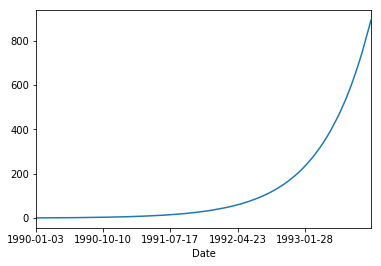

In [8]:
stock_equity_df["index"].plot()

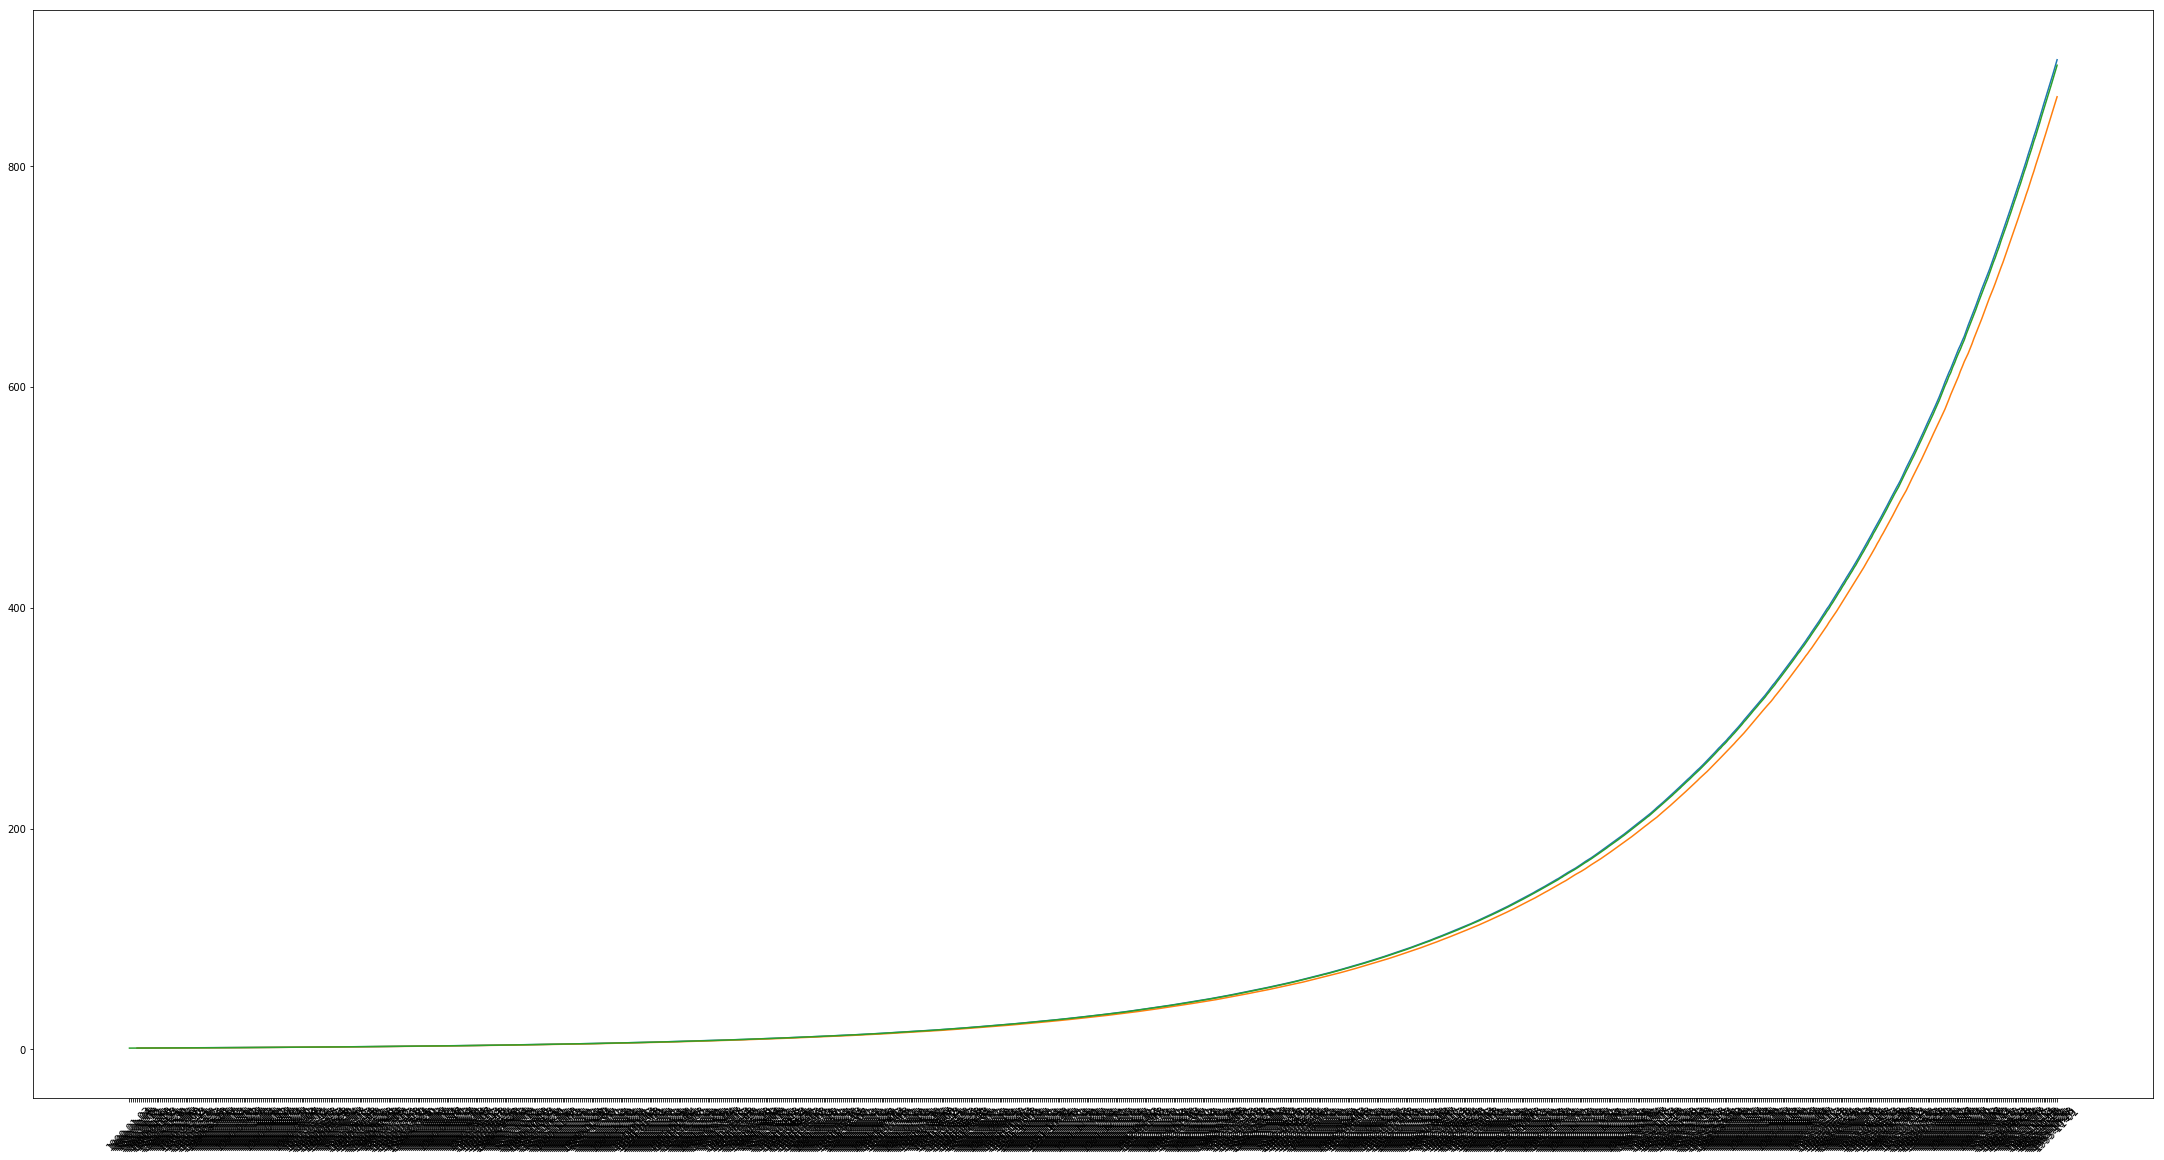

In [9]:
bbands_nda = ta.BBANDS(stock_equity_df["index"])
stock_equity_df["bolling_band_upper"] = bbands_nda[0]
stock_equity_df["bolling_band_middle"] = bbands_nda[1]
stock_equity_df["bolling_band_down"] = bbands_nda[2]

fig=plt.figure(figsize=(38,20))
plt.plot(stock_equity_df.index,stock_equity_df["bolling_band_upper"])
plt.plot(stock_equity_df.index,stock_equity_df["bolling_band_down"])
plt.plot(stock_equity_df.index,stock_equity_df["index"])
plt.xticks(rotation=45)
plt.show()

In [10]:
print((valid_data_df[(valid_data_df.index>="1991-07-17")].iloc[:,1].mean()))

0.012259595508684022


In [11]:
print((valid_data_df[(valid_data_df.index<="1991-07-17")].iloc[:,1].mean()))

-0.06853954873011824
